In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
pd.set_option('display.max_columns', None)
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='darkgrid', context='talk')

import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [15]:
df.shape

(6819, 96)

In [16]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [17]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [18]:
print(df['Bankrupt?'].value_counts())
print('\n')
print('Financially Stable: ', round(df['Bankrupt?'].value_counts()[0]/len(df)*100, 2), '% of the dataset')
print('Financially Unstable: ', round(df['Bankrupt?'].value_counts()[1]/len(df)*100, 2), '% of the dataset')

0    6599
1     220
Name: Bankrupt?, dtype: int64


Financially Stable:  96.77 % of the dataset
Financially Unstable:  3.23 % of the dataset


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [20]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [27]:
df.duplicated().sum()

0

# Exloration Data Analysis

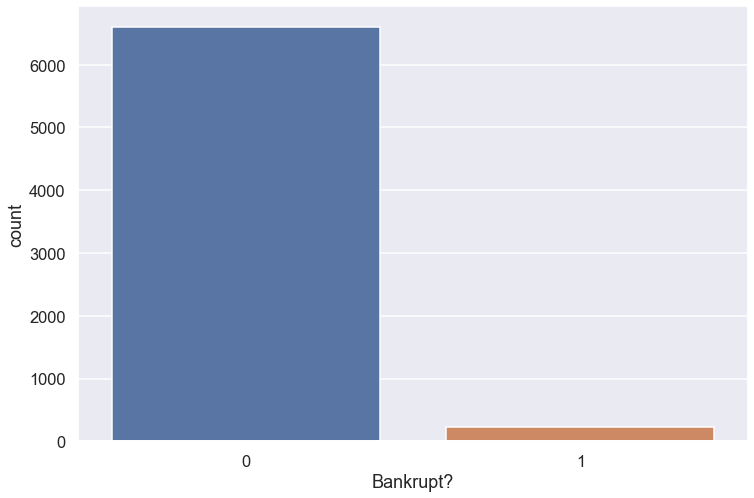

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(df['Bankrupt?'])
plt.show()

The data seems quite unbalanced. So, it needs to be solved.

In [28]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

<AxesSubplot:>

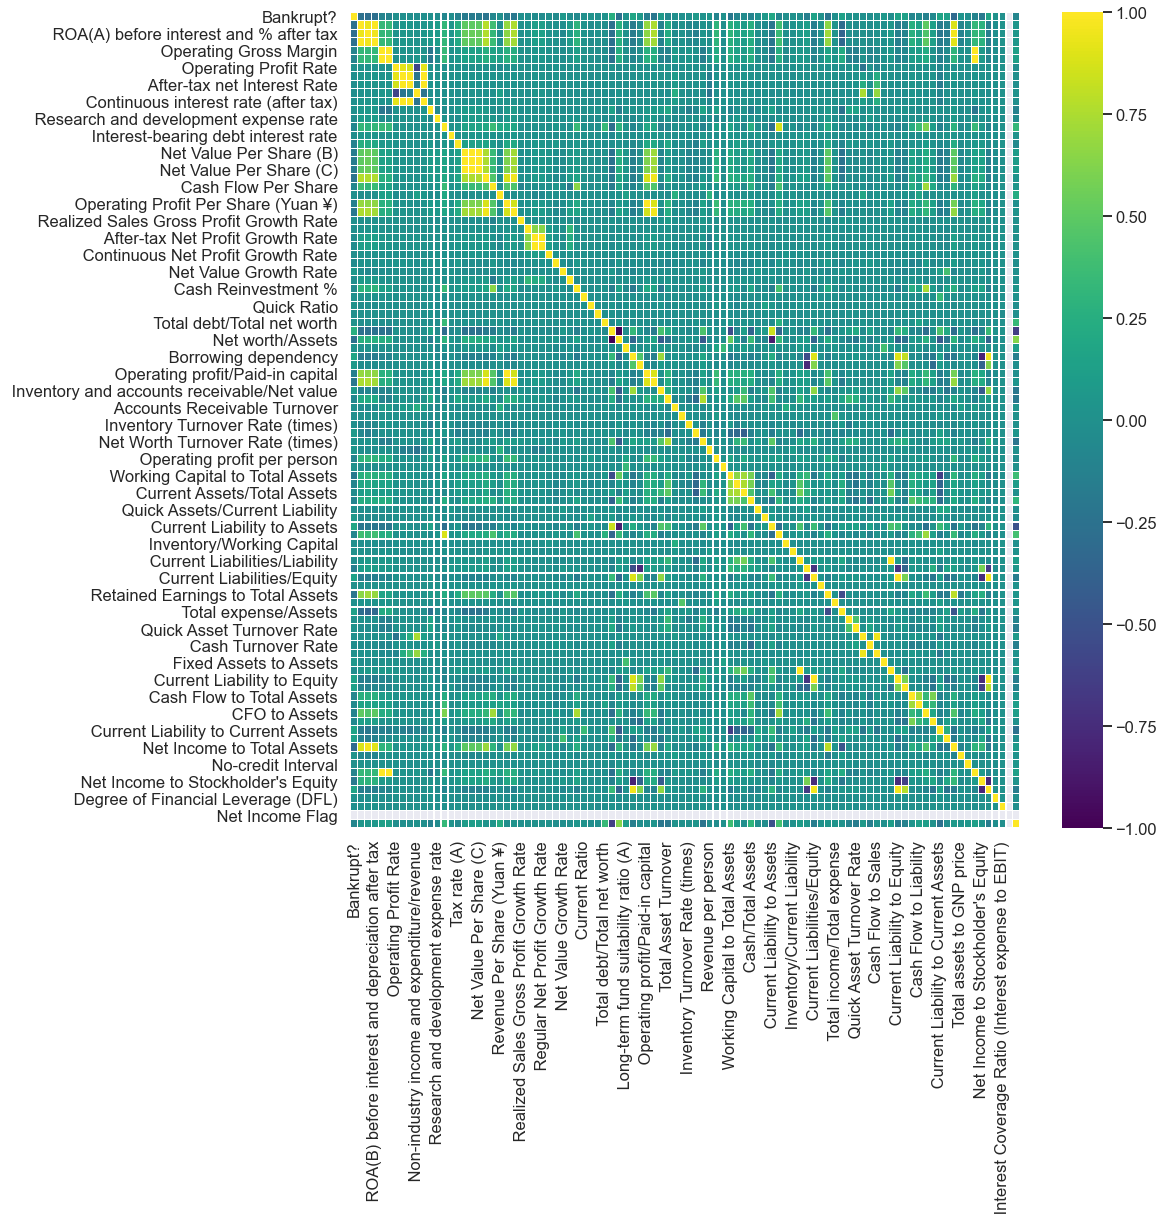

In [49]:
fig, ax=plt.subplots(figsize=(15, 15))
sns.heatmap(corr, ax=ax, cmap='viridis', linewidth=0.1)

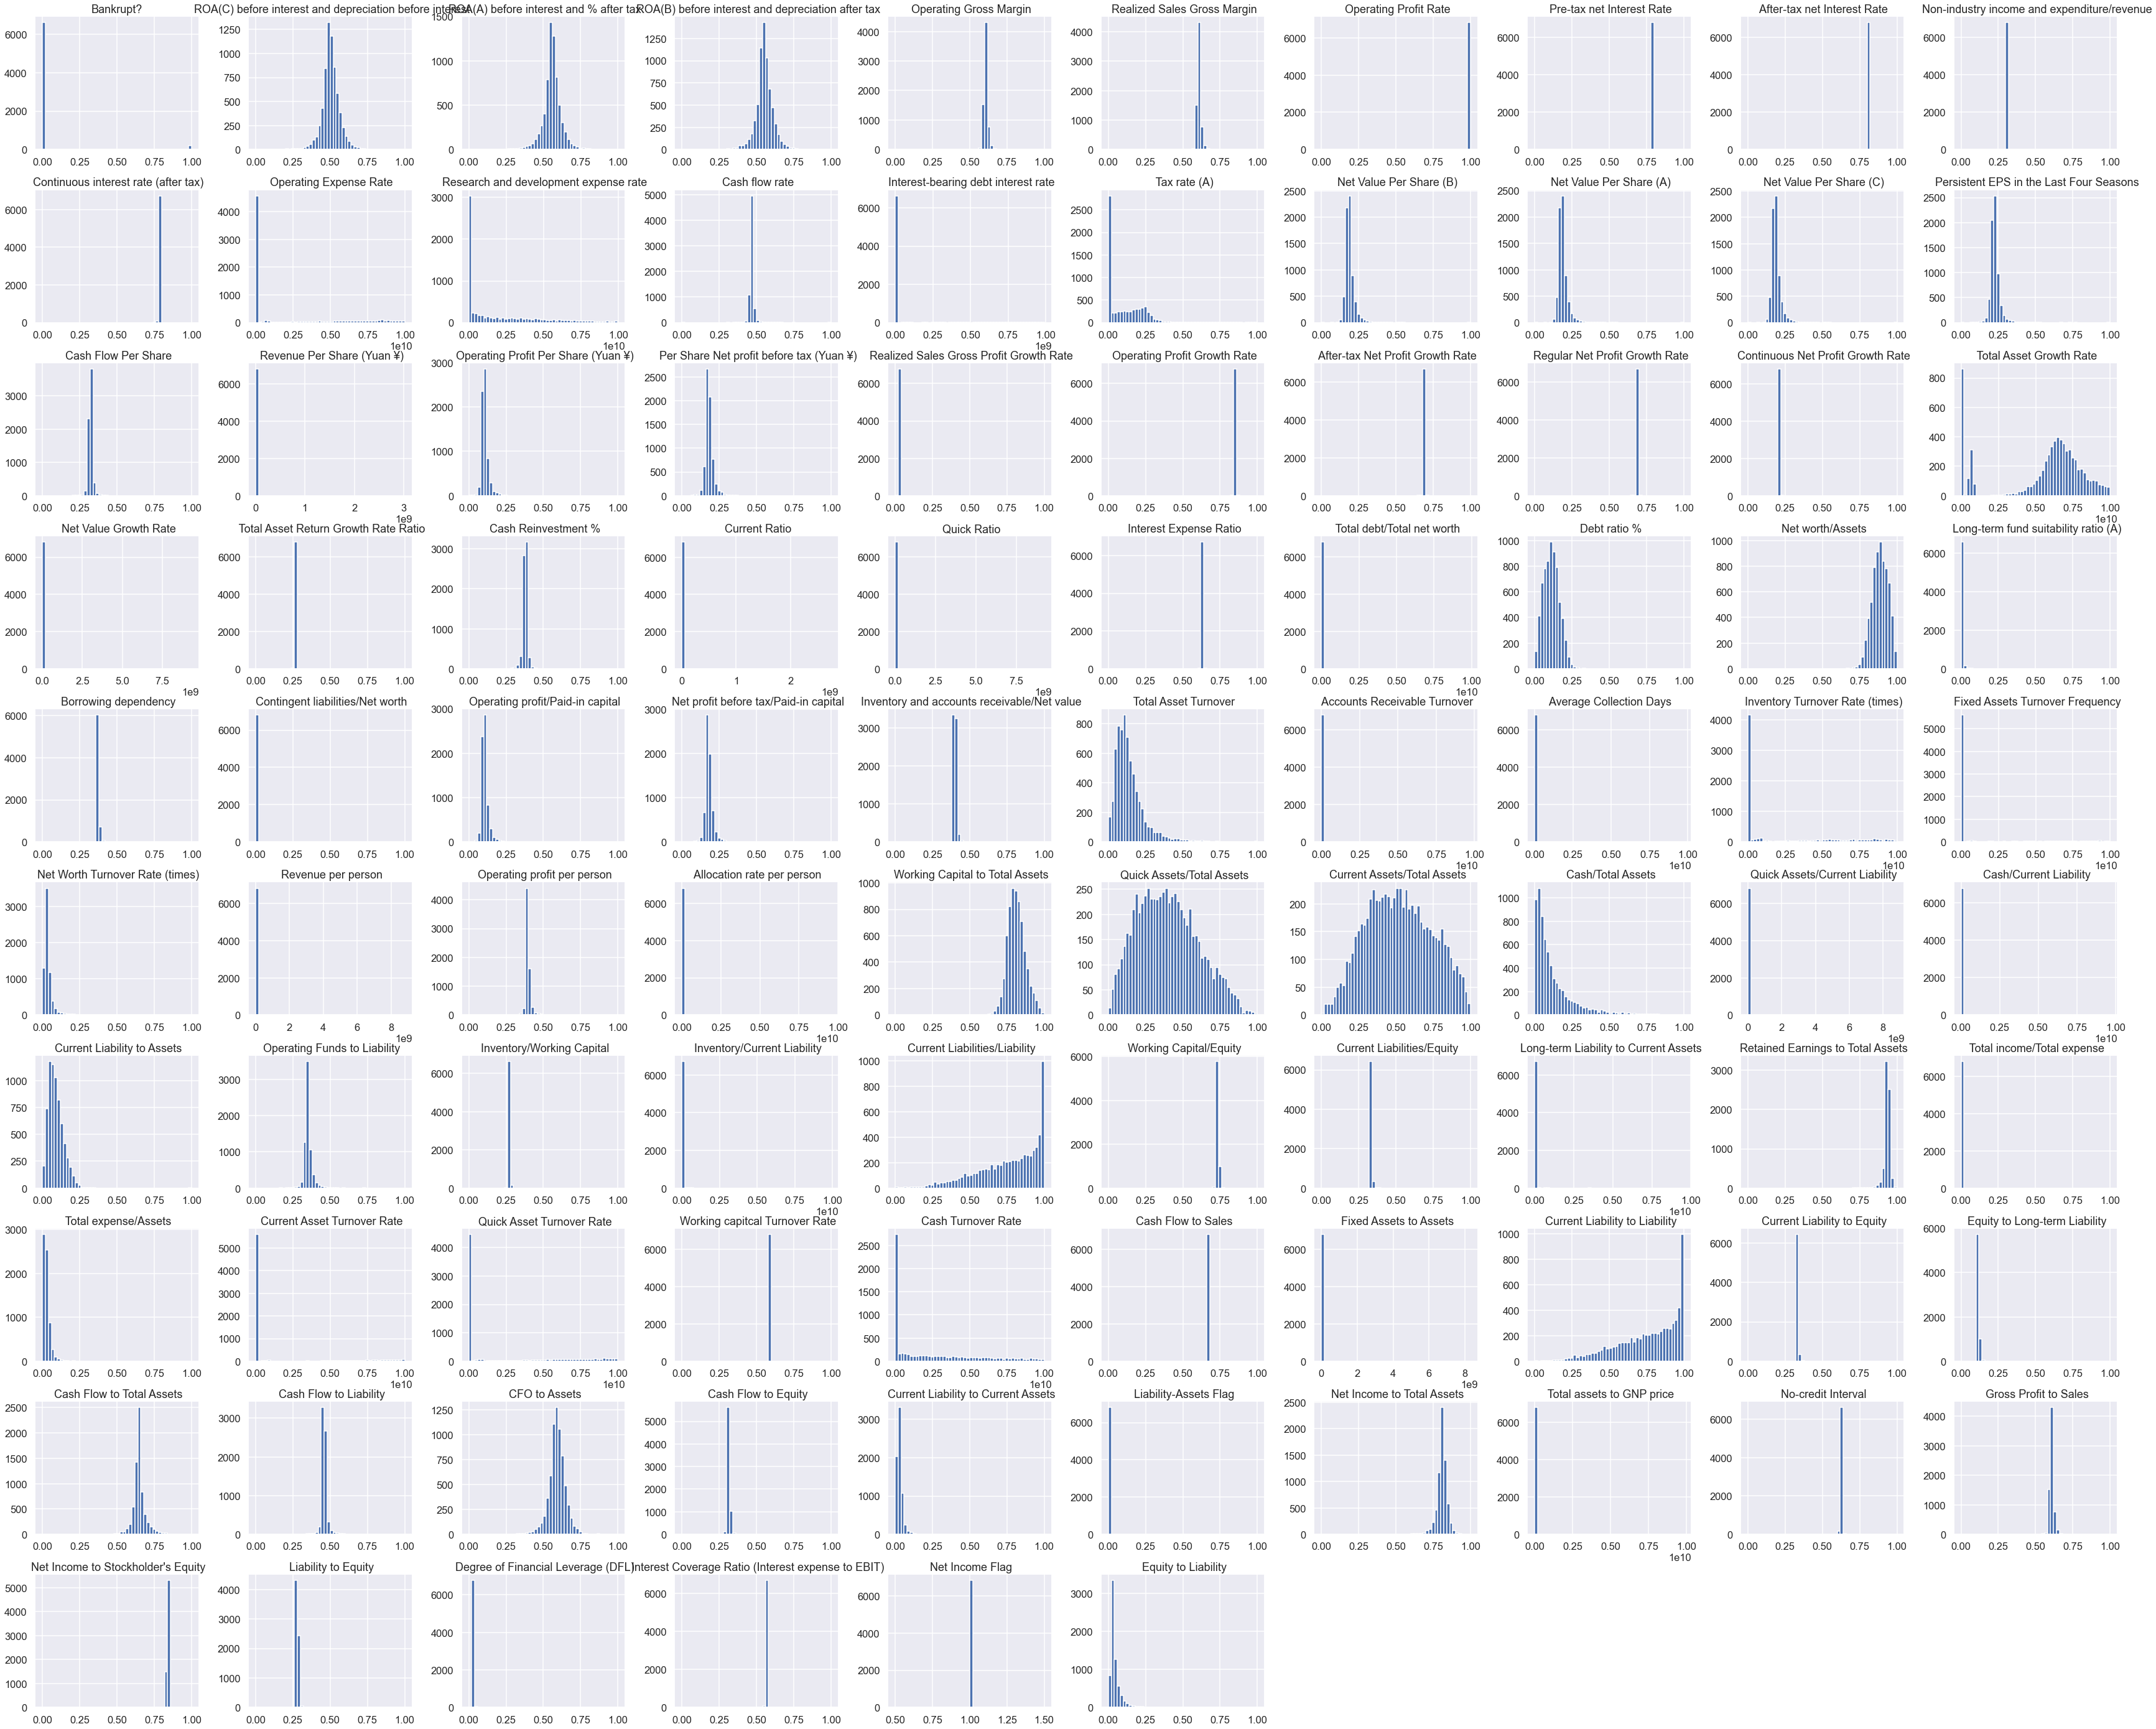

In [29]:
df.hist(figsize=(60, 50), bins=50)
plt.show()

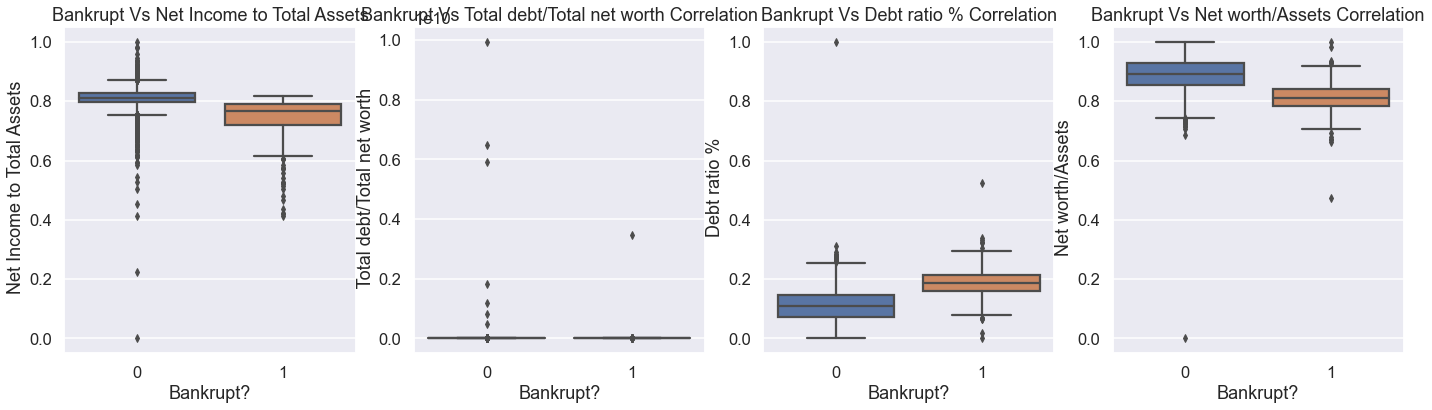

In [36]:
# Ploting interesting features

f, axes=plt.subplots(ncols=4, figsize=(24, 6))

sns.boxplot(x='Bankrupt?', y=' Net Income to Total Assets', data=df, ax=axes[0])
axes[0].set_title('Bankrupt Vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=' Total debt/Total net worth', data=df, ax=axes[1])
axes[1].set_title('Bankrupt Vs Total debt/Total net worth Correlation')

sns.boxplot(x='Bankrupt?', y=' Debt ratio %', data=df, ax=axes[2])
axes[2].set_title('Bankrupt Vs Debt ratio % Correlation')

sns.boxplot(x='Bankrupt?', y=' Net worth/Assets', data=df, ax=axes[3])
axes[3].set_title('Bankrupt Vs Net worth/Assets Correlation')

plt.show()
        

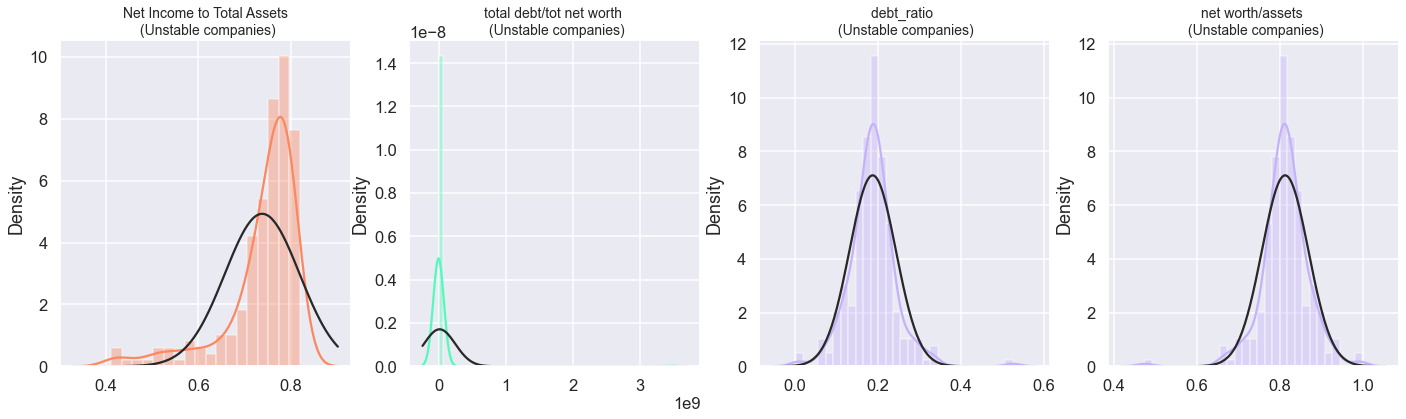

In [41]:
# Let's take a lookt at the distribution of these features for companies that are close to bankruptcy.
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df[' Total debt/Total net worth'].loc[df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df[' Debt ratio %'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df[' Net worth/Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

# Removing the outliers

In [45]:
def remove_outliers(feature, feature_name, df):
    q25, q75=np.percentile(feature, 25), np.percentile(feature, 75) # It identifies 25th and 75th quartiles 
    print('Quartle 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr=q75-q25
    print('iqr: {}'.format(feat_iqr))
    feat_cut_off=feat_iqr*1.5
    feat_lower, feat_upper=q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = df.drop(df[(df[feature_name] > feat_upper) | (df[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return df

for col in df:
    new_df=remove_outliers(df[col], str(col), df)


Quartle 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartle 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartle 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
----------

Quartle 25: 0.0030070491250148 | Quartile 75: 0.00927329266179695
iqr: 0.0062662435367821494
Cut Off: 0.009399365305173223
 Total debt/Total net worth Lower: -0.006392316180158423
 Total debt/Total net worth Upper: 0.018672657966970173
 Total debt/Total net worth outliers for close to bankruptcy cases: 407
-----------------------------------------------------------------
Quartle 25: 0.0728905281615624 | Quartile 75: 0.148804305106267
iqr: 0.0759137769447046
Cut Off: 0.1138706654170569
 Debt ratio % Lower: -0.0409801372554945
 Debt ratio % Upper: 0.2626749705233239
 Debt ratio % outliers for close to bankruptcy cases: 30
-----------------------------------------------------------------
Quartle 25: 0.8511956948937329 | Quartile 75: 0.927109471838438
iqr: 0.07591377694470502
Cut Off: 0.11387066541705754
 Net worth/Assets Lower: 0.7373250294766753
 Net worth/Assets Upper: 1.0409801372554954
 Net worth/Assets outliers for close to bankruptcy cases: 30
---------------------------------------

 Current Liability to Assets outliers for close to bankruptcy cases: 95
-----------------------------------------------------------------
Quartle 25: 0.34102297735578047 | Quartile 75: 0.3609148870133705
iqr: 0.019891909657590023
Cut Off: 0.029837864486385035
 Operating Funds to Liability Lower: 0.31118511286939543
 Operating Funds to Liability Upper: 0.3907527514997555
 Operating Funds to Liability outliers for close to bankruptcy cases: 657
-----------------------------------------------------------------
Quartle 25: 0.2770339694810945 | Quartile 75: 0.2774287054274715
iqr: 0.0003947359463770117
Cut Off: 0.0005921039195655176
 Inventory/Working Capital Lower: 0.27644186556152894
 Inventory/Working Capital Upper: 0.278020809347037
 Inventory/Working Capital outliers for close to bankruptcy cases: 944
-----------------------------------------------------------------
Quartle 25: 0.0031631476746991002 | Quartile 75: 0.011146766748190151
iqr: 0.007983619073491051
Cut Off: 0.01197542861023

-----------------------------------------------------------------
Quartle 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
 Liability-Assets Flag Lower: 0.0
 Liability-Assets Flag Upper: 0.0
 Liability-Assets Flag outliers for close to bankruptcy cases: 8
-----------------------------------------------------------------
Quartle 25: 0.7967498491931705 | Quartile 75: 0.8264545295408715
iqr: 0.029704680347701018
Cut Off: 0.04455702052155153
 Net Income to Total Assets Lower: 0.752192828671619
 Net Income to Total Assets Upper: 0.871011550062423
 Net Income to Total Assets outliers for close to bankruptcy cases: 561
-----------------------------------------------------------------
Quartle 25: 0.0009036204813306 | Quartile 75: 0.0052697768568805
iqr: 0.0043661563755499
Cut Off: 0.00654923456332485
 Total assets to GNP price Lower: -0.005645614081994249
 Total assets to GNP price Upper: 0.01181901142020535
 Total assets to GNP price outliers for close to bankruptcy cases: 797
---------------

In [46]:
new_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [48]:
print('After remover outliers: ', new_df.shape)
print('Original dataset: ', df.shape)

After remover outliers:  (6819, 96)
Original dataset:  (6819, 96)


In [67]:
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

In [68]:
# The data seems clean for now. So let's split it into train and test datasets

from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


X=df.drop(['Bankrupt?'], axis=1)
X=X.drop([' Net Income Flag'], axis=1)
y=df['Bankrupt?']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [75]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (4773, 94)
X_test:  (2046, 94)
y_train:  (4773,)
y_test:  (2046,)


In [69]:
# Let's train the model with SGDClassifier, first.
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred=sgd_clf.predict(X_test)

# Performance Evaluation

## Cross Validation

One way to evaluate the performance and to find its accuracy is to use k-fold cross validation technique. The following code randomly splits the data into 
10 distinct subsets or folds, then it trains and evaluates the model 10 times by picking a different fold for 
evaluation every time and training on other 9 folds. 

In [77]:

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')

array([0.9707113 , 0.9623431 , 0.9623431 , 0.9706499 , 0.8721174 ,
       0.95597484, 0.96855346, 0.77148847, 0.96645702, 0.9706499 ])

It shows the model's accuracy between 77% to 97% based on training and evaluating the model on 10 different folds. 

## Confusion Matrix

Another way to evaluate a model's performance is to take a look at the confusion matrix becuase it counts the number of times instances of class A are classifed as class B. 


In [78]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

Confusion Matrix: 


array([[1966,    2],
       [  78,    0]])

Each row in this confusion matrix represents an actual class, and each column represents a predicted class. 1966 of them are correctly classified which is called 'True Negative', while the remaining 2 are wrongly classified, called 'False Positive'. In the second row, 78 of them are wrongly classifed which is called 'False Negative', while there is 0 'True positive'.

In [86]:
#To be more accurate, let's take a look at the accuracy of positive prediction by finding its precision and recall.
from sklearn.metrics import precision_score, recall_score, f1_score
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Classification Report: ')
print(metrics.classification_report(y_test, y_pred))

Accuracy score:  0.9608993157380255
MSE:  0.039100684261974585
Precision:  0.0
Recall:  0.0
F1_score:  0.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046



# Logistic Regression

In [87]:

model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)
print('Classification Report: ')
print(metrics.classification_report(y_test, y_pred))

Accuracy score:  0.9574780058651027
MSE:  0.04252199413489736
Precision:  0.09090909090909091
Recall:  0.01282051282051282
F1_score:  0.02247191011235955
Confusion Matrix: 
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1968
           1       0.09      0.01      0.02        78

    accuracy                           0.96      2046
   macro avg       0.53      0.50      0.50      2046
weighted avg       0.93      0.96      0.94      2046



# Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

forest_clf=RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1)
forest_clf.fit(X_train, y_train)
y_pred=forest_clf.predict(X_test)

print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)
print('Classification Report: ')
print(metrics.classification_report(y_test, y_pred))

Accuracy score:  0.9652981427174976
MSE:  0.03470185728250244
Precision:  0.7333333333333333
Recall:  0.14102564102564102
F1_score:  0.23655913978494622
Confusion Matrix: 
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.73      0.14      0.24        78

    accuracy                           0.97      2046
   macro avg       0.85      0.57      0.61      2046
weighted avg       0.96      0.97      0.95      2046



# Support Vector Machine

In [103]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train, y_train)
y_pred=svm_clf.predict(X_test)

print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)
print('Classification Report: ')
print(metrics.classification_report(y_test, y_pred))

Accuracy score:  0.9618768328445748
MSE:  0.03812316715542522
Precision:  0.0
Recall:  0.0
F1_score:  0.0
Confusion Matrix: 
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046



In [117]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
y_pred=pd.DataFrame(y_pred)

In [119]:
y_pred[0].value_counts()

0    2031
1      15
Name: 0, dtype: int64